### Домашнее задание «Визуализация данных»

#### Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

#### Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком).
Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# базовый EDA проводится на примере набора данных по новостройкам Санкт-Петербурга за период с 2013 по 2021 гг.
df = pd.read_csv('C:\\Users\\Ryzen\\Desktop\\DataSet\\Data Analyst\\13_data_visualization\\final.csv', sep = ",")
df.head()

,date,name,developer,min_price,max_price,min_square,max_square,flat_count,class_building,type_building,parking,address,trimming,num_floors,origin_url
0,2013-04-10T20:00:00.000Z,ЖК Лондон Парк,Л1,68000,88500,27.35,147.19,2180,Бизнес-класс,Кирпично-монолитный,True,пр. Просвещения. 43А (Посмотреть на карте),под чистовую,2-25,https://spbguru.ru/novostroyki/208-london-park
1,2013-04-15T20:00:00.000Z,ЖК Лондон Парк,Л1,68000,88500,27.35,147.19,2180,Бизнес-класс,Кирпично-монолитный,True,пр. Просвещения. 43А (Посмотреть на карте),под чистовую,2-25,https://spbguru.ru/novostroyki/208-london-park
2,2013-05-16T20:00:00.000Z,ЖК Лондон Парк,Л1,68000,88500,27.35,147.19,2180,Бизнес-класс,Кирпично-монолитный,True,пр. Просвещения. 43А (Посмотреть на карте),под чистовую,2-25,https://spbguru.ru/novostroyki/208-london-park
3,2013-12-25T20:00:00.000Z,ЖК Юттери,ЛенСтройТрест,55757,60865,29.89,83.24,2100,Комфорт-класс,Панельный,True,Лагерное ш./Понтонная ул. (Посмотреть на карте),без отделки,4,https://spbguru.ru/novostroyki/372-jutteri
4,2013-12-25T20:00:00.000Z,ЖК Яблоневый цвет,Матрикс,33145,44667,27.00,93.59,270,Эконом класс,Монолитный,True,пос. Малое Верево (Посмотреть на карте),с отделкой и без,8,https://spbguru.ru/novostroyki/370-jablonevyj-...


In [17]:
# проверка типа данных
df["date"].dtypes

dtype('O')

In [18]:
# Для проведения расчетов переходим из datetime оставляем только год 
# переводим формат данных в столбце из object в int64
df['date'] = pd.DatetimeIndex(df['date']).year
df.rename(columns={'date': 'year'}, inplace=True)
df

,year,name,developer,min_price,max_price,min_square,max_square,flat_count,class_building,type_building,parking,address,trimming,num_floors,origin_url
0,2013,ЖК Лондон Парк,Л1,68000,88500,27.35,147.19,2180,Бизнес-класс,Кирпично-монолитный,True,пр. Просвещения. 43А (Посмотреть на карте),под чистовую,2-25,https://spbguru.ru/novostroyki/208-london-park
1,2013,ЖК Лондон Парк,Л1,68000,88500,27.35,147.19,2180,Бизнес-класс,Кирпично-монолитный,True,пр. Просвещения. 43А (Посмотреть на карте),под чистовую,2-25,https://spbguru.ru/novostroyki/208-london-park
2,2013,ЖК Лондон Парк,Л1,68000,88500,27.35,147.19,2180,Бизнес-класс,Кирпично-монолитный,True,пр. Просвещения. 43А (Посмотреть на карте),под чистовую,2-25,https://spbguru.ru/novostroyki/208-london-park
3,2013,ЖК Юттери,ЛенСтройТрест,55757,60865,29.89,83.24,2100,Комфорт-класс,Панельный,True,Лагерное ш./Понтонная ул. (Посмотреть на карте),без отделки,4,https://spbguru.ru/novostroyki/372-jutteri
4,2013,ЖК Яблоневый цвет,Матрикс,33145,44667,27.00,93.59,270,Эконом класс,Монолитный,True,пос. Малое Верево (Посмотреть на карте),с отделкой и без,8,https://spbguru.ru/novostroyki/370-jablonevyj-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2021,ЖК DelArte,Engel & Volkers,400000,600000,57.90,230.00,10,Элит-класс,Монолитный,True,Петроградский район.Санаторная аллея,Предчистовая,3,https://spbguru.ru/novostroyki/632-zhk-delarte...
7668,2021,ЖК Дуплексы,IMD Group,29322,29322,358.09,358.09,10,Эконом класс,Таунхаус,True,Всеволожский район.д. Юкки. ул. Тенистая,Черновая,4,https://spbguru.ru/novostroyki/613-dupleksy
7669,2021,ЖК Привокзальный переулок 6,Добрострой,54606,54606,45.60,45.60,54,Эконом класс,Блочный,True,Выборг.Привокзальный пер.. 6,Чистовая Черновая,3,https://spbguru.ru/novostroyki/938-dom-v-privo...
7670,2021,ЖК Софийский бульвар,МНР-1,163000,190893,99.50,282.00,18,Элит-класс,Кирпич-монолит,True,Пушкин. Софийский бул.. 32А,Черновая,4,https://spbguru.ru/novostroyki/813-zhk-sofijsk...


In [19]:
# проверяем преобразование типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            7672 non-null   int64  
 1   name            7672 non-null   object 
 2   developer       7672 non-null   object 
 3   min_price       7672 non-null   int64  
 4   max_price       7672 non-null   int64  
 5   min_square      7672 non-null   float64
 6   max_square      7672 non-null   float64
 7   flat_count      7641 non-null   object 
 8   class_building  7672 non-null   object 
 9   type_building   7672 non-null   object 
 10  parking         7672 non-null   bool   
 11  address         7672 non-null   object 
 12  trimming        7672 non-null   object 
 13  num_floors      7672 non-null   object 
 14  origin_url      7672 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 846.7+ KB


Text(0.5, 1.0, 'Correlation between min_price and year')

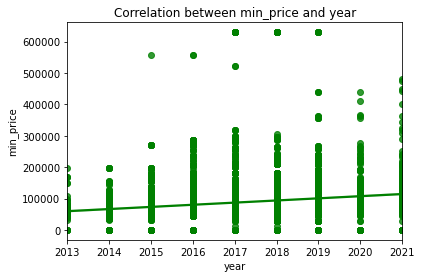

In [20]:
# Определяем динамику стоимости руб за 1 м.кв:
ax = sns.regplot(data=df, x='year', y='min_price', color='green', marker='o')
ax.set_title('Correlation between min_price and year')

#### Вывод по графику 'Correlation between min_price and year':
В целом динамика роста стоимости недвижимости в  с 2013 по 2021 положительная. За период с 2013 по 2017 гг. наблюдается рост стоимости. С 2017 по 2019 снижение. В 2020 стагнация цен. В 2021 предпосылки к росту цены в 1,5 - 2 раза  

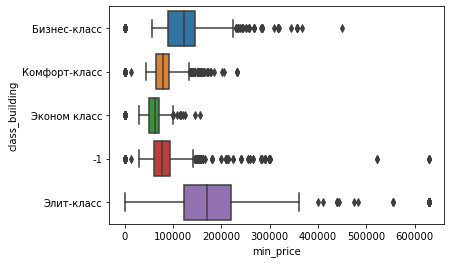

In [21]:
# Зависимость стоимости от класса недвижимости:

top_class_building = df.class_building.value_counts().sort_values(ascending = False).head(10).index.values
top_class_building
sns.boxplot(x="min_price", y="class_building",
            data=df[df.class_building.isin(top_class_building)])

#### Выводы:
Диапазон цен на элит-класс имеет пересечение с диапазонами остальных классов. Что указывает на отсутствие общепринятых стандартов и понимания у игроков рынка - что такое элит-класс. Позиционирование жилья, как элит-класс в большей мере делается в рекламных целях. При этом на рынке присутствуют предложения в других классах жилья, которые конкурируют с элит-классом 

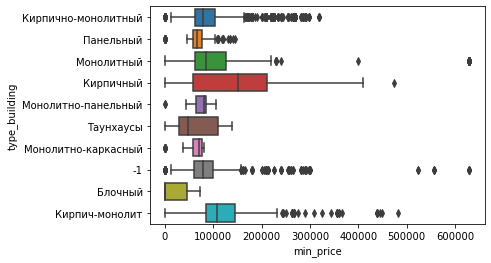

In [22]:
# Зависимость стоимости от типа строительства недвижимости:

top_type_building = df.type_building.value_counts().sort_values(ascending = False).head(10).index.values
top_type_building
sns.boxplot(x="min_price", y="type_building", 
            data=df[df.type_building.isin(top_type_building)])

#### Выводы: 
Наиболее популярные типы строительства недвижимости - кирпич и кирпич-монолит. Наименее предпочтительный - блочный тип.

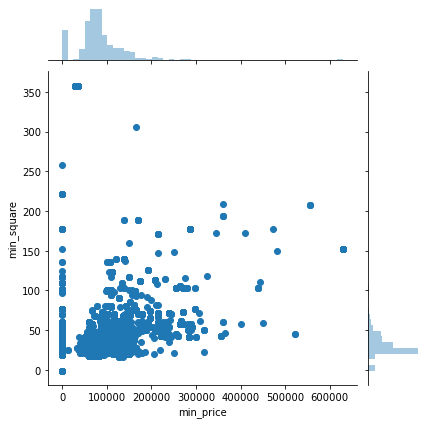

In [23]:
# Зависимость стоимости 1 м.кв. от площади недвижимости
sns.jointplot(x='min_price', y='min_square', 
              data=df, kind='scatter')

#### Выводы:
Наиболее популярный диапазон площади от 35 до 50 при средней цене 100 т.р/м.кв

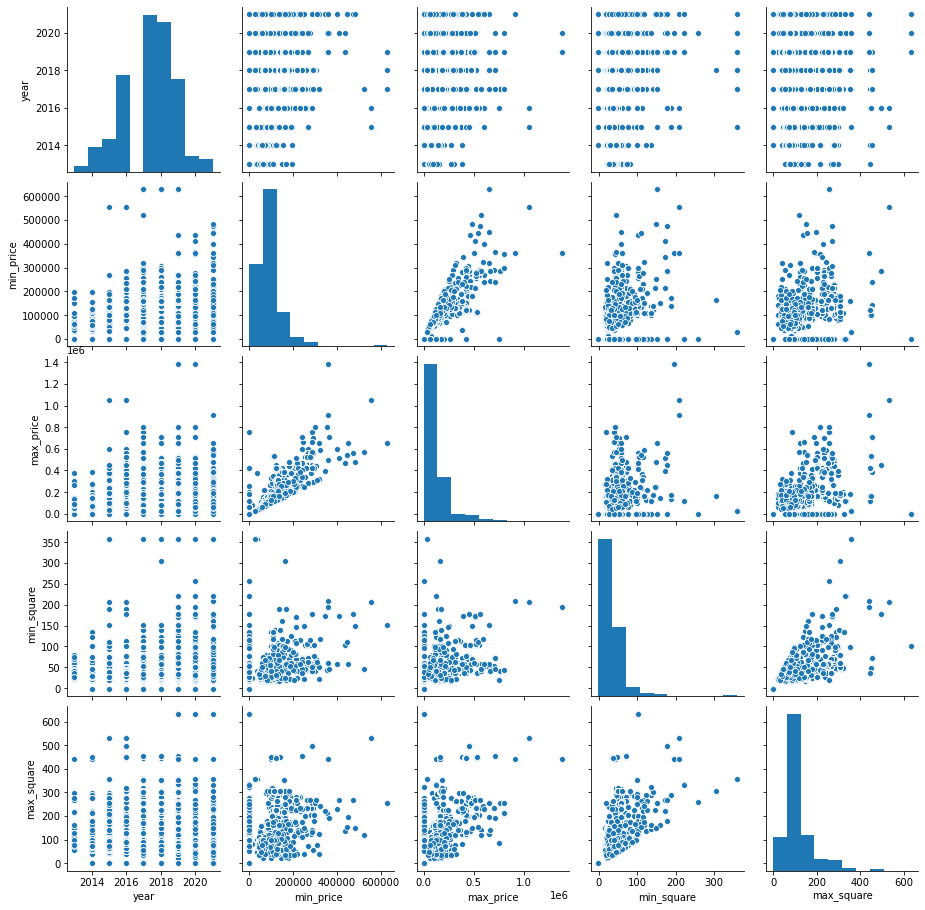

In [25]:
sns.pairplot(df[['year', 'min_price', 'max_price', 'min_square', 'max_square']])

### Помогите понять...
Почему не строится тепловая карта?

In [36]:
top_developer = df.developer.value_counts().sort_values(ascending = False).head().index.values
top_developer

array(['-1', 'ЦДС', 'Л1', 'Лидер Групп', 'Setl City'], dtype=object)

In [33]:
name_developer_min_price = df[df.name.isin(top_developer)].pivot_table(
                        index='name', 
                        columns='developer', 
                        values='min_price', 
                        aggfunc=sum).fillna(0)

name_developer_min_price

name


In [31]:
sns.heatmap(name_developer_min_price())

TypeError: 'DataFrame' object is not callable